### Implementation

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

### Dataset Preperation

In [37]:
X, y = make_blobs(n_samples = 500, centers= 5, random_state= 3)

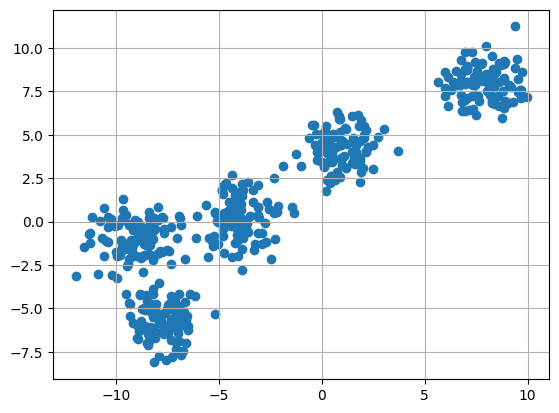

In [38]:
plt.figure(0)
plt.grid("on")
plt.scatter(X[:,0], X[:, 1])
plt.show()

In [39]:
k = 5

color = ["green", "red", "blue", "yellow", "orange"]

clusters = {}

for i in range(k):
    center = 10 * (2 * np.random.random((X.shape[1],)) - 1)
    points = []

    cluster = {
        'center' : center,
        'points' : points,
        'color' : color[i]
    }

    clusters[i] = cluster

In [40]:
clusters

{0: {'center': array([-1.76300671, -3.16336321]),
  'points': [],
  'color': 'green'},
 1: {'center': array([2.40432182, 4.678148  ]), 'points': [], 'color': 'red'},
 2: {'center': array([-6.95201594,  5.86600063]),
  'points': [],
  'color': 'blue'},
 3: {'center': array([-5.71788947,  3.70241433]),
  'points': [],
  'color': 'yellow'},
 4: {'center': array([-6.22381104,  5.33927096]),
  'points': [],
  'color': 'orange'}}

In [41]:
def distance(v1, v2):
    return np.sqrt(np.sum((v1 - v2) ** 2))

In [42]:
# Assign every data point to one of the clusters
def assignPointToClusters(clusters):
    for ix in range(X.shape[0]): # E-Step
        dist = []
        curr_x = X[ix]

        for kx in range(k):
            d = distance(curr_x, clusters[kx]['center'])
            dist.append(d)

        current_cluster = np.argmin(dist)

        clusters[current_cluster]['points'].append(curr_x)

def updateClusters(clusters): # M-Step -> We update every cluster according to the mean 
    for kx in range(k):
        pts = np.array(clusters[kx]['points'])

        if pts.shape[0] > 0: # If a cluster has some - nonzero points
            new_u = pts.mean(axis = 0)
            clusters[kx]['center'] = new_u
            clusters[kx]['points'] = [] # Clear the list


def plotClusters(clusters):
    for kx in range(k):
        pts = np.array(clusters[kx]['points'])

        # Plot the points
        try:
            plt.scatter(pts[:, 0], pts[:, 1], color = clusters[kx]['color'])
        except:
            pass

        # Plot the cluster center
        uk = clusters[kx]['center']
        plt.scatter(uk[0], uk[1], color = 'black', marker ="*")

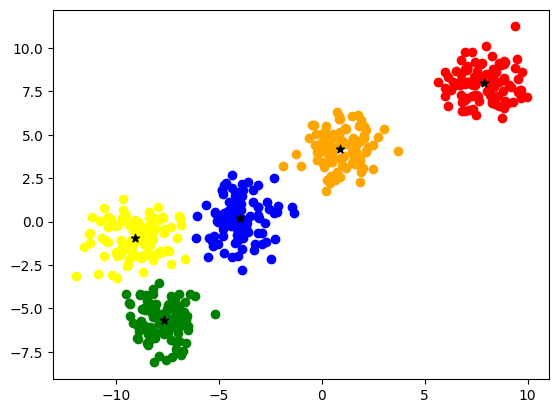

In [56]:
assignPointToClusters(clusters)
plotClusters(clusters)
updateClusters(clusters)